In [2]:
library(ggplot2)
library(dplyr)
library(stringr)
library(ggplot2)
library(tidyverse)
library(ggridges)
setwd('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [1]:
c9df = read.csv('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/apa_type_dist_allCTs.csv')
salsdf = read.csv('/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/apa_sALS_type_dist_allCTs.csv')

In [3]:
main_celltypes = c('Microglia_C9ALSvsCTRL', 'Inhibitory_C9ALSvsCTRL', 'Excitatory_C9ALSvsCTRL',
 'Astrocytes_C9ALSvsCTRL', 'OPC_C9ALSvsCTRL', 'Oligodendrocytes_C9ALSvsCTRL',
 'Microglia_sALSvsCTRL', 'Inhibitory_sALSvsCTRL', 'Excitatory_sALSvsCTRL', 
 'Astrocytes_sALSvsCTRL', 'OPC_sALSvsCTRL', 'Oligodendrocytes_sALSvsCTRL')
# keep only the main cell types
c9df = c9df[c9df$celltype %in% main_celltypes,]
c9df$celltype = factor(c9df$celltype, levels = main_celltypes)

salsdf = salsdf[salsdf$celltype %in% main_celltypes,]
salsdf$celltype = factor(salsdf$celltype, levels = main_celltypes)

In [4]:
# remove the _sALSvsCTRL and _C9ALSvsCTRL from the celltype names
salsdf$celltype = gsub('_sALSvsCTRL', '', salsdf$celltype)
c9df$celltype = gsub('_C9ALSvsCTRL', '', c9df$celltype)

In [6]:
head(c9df)

,gene_name,APA_direction,APA_type,celltype,APA_LFC,p_val,id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
27506,A2ML1,Proximal APA,3' most exon,Astrocytes,-0.5611812,1.744950e-03,chr12:A2ML1:8875813:8876783:+
27507,AAAS,Distal APA,3' most exon,Astrocytes,0.6601665,1.585937e-03,chr12:AAAS:53298713:53307460:-
27508,AAED1,Proximal APA,3' most exon,Astrocytes,-0.7963314,1.712356e-04,chr9:AAED1:96639577:96641251:-
27509,AAGAB,Distal APA,Intron,Astrocytes,0.9089647,1.310383e-04,chr15:AAGAB:67201028:67207927:-
27510,AAGAB,Distal APA,Intron,Astrocytes,1.0149132,5.524490e-07,chr15:AAGAB:67201672:67207927:-
27511,AAGAB,Distal APA,Intron,Astrocytes,0.8730162,3.152744e-05,chr15:AAGAB:67202710:67207927:-


In [7]:
head(salsdf)

,gene_name,APA_direction,APA_type,celltype,APA_LFC,p_val,id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
43933,A2ML1,Distal APA,3' most exon,Astrocytes,0.7792158,3.317758e-04,chr12:A2ML1:8875813:8877345:+
43934,A2ML1,Distal APA,3' most exon,Astrocytes,1.6190139,7.807399e-11,chr12:A2ML1:8875813:8879773:+
43935,A2ML1,Distal APA,3' most exon,Astrocytes,0.5562248,2.724863e-05,chr12:A2ML1:8876783:8877345:+
43936,A2ML1,Distal APA,3' most exon,Astrocytes,1.3960229,8.785472e-15,chr12:A2ML1:8876783:8879773:+
43937,A2ML1,Distal APA,3' most exon,Astrocytes,0.8397981,6.725913e-07,chr12:A2ML1:8877345:8879773:+
43938,AADAT,Distal APA,3' most exon,Astrocytes,0.3486133,3.345783e-03,chr4:AADAT:170060271:170060673:-


Picking joint bandwidth of 0.146

Picking joint bandwidth of 0.182

Picking joint bandwidth of 0.093

Picking joint bandwidth of 0.157

Picking joint bandwidth of 0.0741

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.146

Picking joint bandwidth of 0.182

Picking joint bandwidth of 0.093

Picking joint bandwidth of 0.157

Picking joint bandwidth of 0.0741

Picking joint bandwidth of 0.115



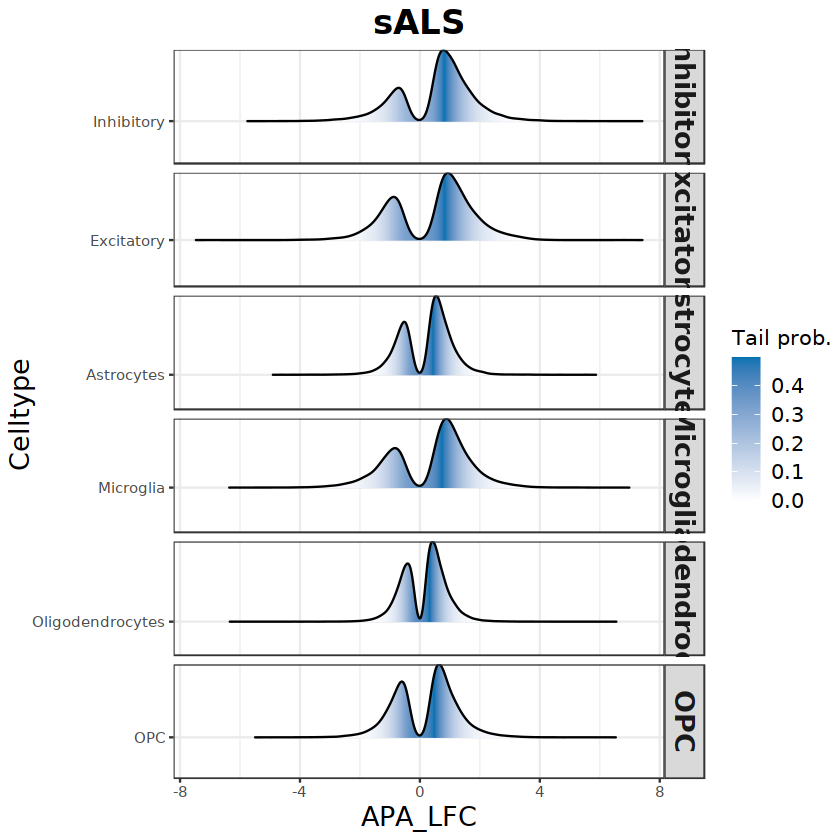

In [8]:
salsdf %>% mutate(celltype = factor(celltype, levels = rev(c("OPC", "Oligodendrocytes", "Microglia", "Astrocytes", "Excitatory", "Inhibitory")))) %>%
  ggplot(aes(x = APA_LFC, y = celltype, fill = 0.5 - abs(0.5 - stat(ecdf)))) +
  stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_gradient(low = "white", high = "#0072B2", name = "Tail prob.") +
  facet_grid(celltype ~ ., scales = "free") + 
  labs(title = 'sALS',
       x = "APA_LFC",
       y = "Celltype") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    strip.text = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 12)
  )

# Save the plot in pdf and with high resolution
ggsave("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/plots/sALS_APA_ridgeplot.pdf", ,width = 8, height = 11, dpi = 300)


Picking joint bandwidth of 0.102

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.0736

Picking joint bandwidth of 0.155

Picking joint bandwidth of 0.0551

Picking joint bandwidth of 0.105

Picking joint bandwidth of 0.102

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.0736

Picking joint bandwidth of 0.155

Picking joint bandwidth of 0.0551

Picking joint bandwidth of 0.105



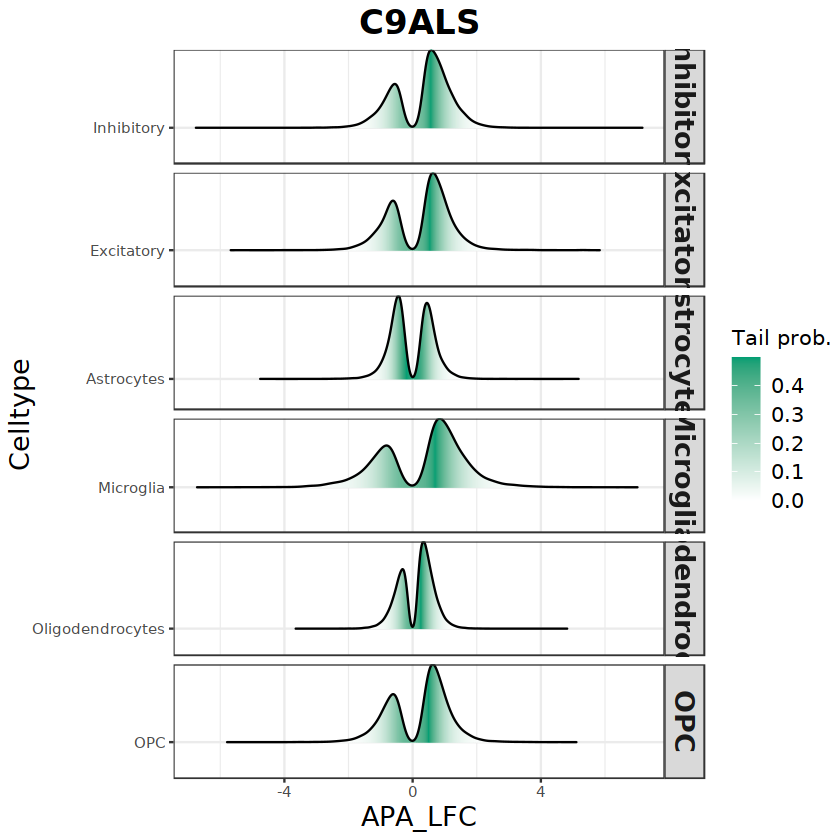

In [9]:
c9df %>% mutate(celltype = factor(celltype, levels = rev(c("OPC", "Oligodendrocytes", "Microglia", "Astrocytes", "Excitatory", "Inhibitory")))) %>%
  ggplot(aes(x = APA_LFC, y = celltype, fill = 0.5 - abs(0.5 - stat(ecdf)))) +
  stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_gradient(low = "white", high = "#009E73", name = "Tail prob.") +
  facet_grid(celltype ~ ., scales = "free") + 
  labs(title = 'C9ALS',
       x = "APA_LFC",
       y = "Celltype") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    strip.text = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 12)
  )

# Save the plot with high resolution
ggsave("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/plots/C9ALS_APA_ridgeplot.pdf",width = 8, height = 11, dpi = 300)



In [18]:
c9df_summary <- c9df %>%
  group_by(celltype, APA_type, APA_direction) %>%
  summarise(count = n())
head(c9df_summary)

`summarise()` has grouped output by 'celltype', 'APA_type'. You can override
using the `.groups` argument.


celltype,APA_type,APA_direction,count
<chr>,<chr>,<chr>,<int>
Astrocytes,3' most exon,Distal APA,8010
Astrocytes,3' most exon,Proximal APA,9616
Astrocytes,5' most exon,Distal APA,130
Astrocytes,5' most exon,Proximal APA,83
Astrocytes,Internal exon,Distal APA,812
Astrocytes,Internal exon,Proximal APA,450


In [19]:
max(c9df_summary$count)

[1] 19799

In [20]:
dim(c9df_summary)

[1] 60  4

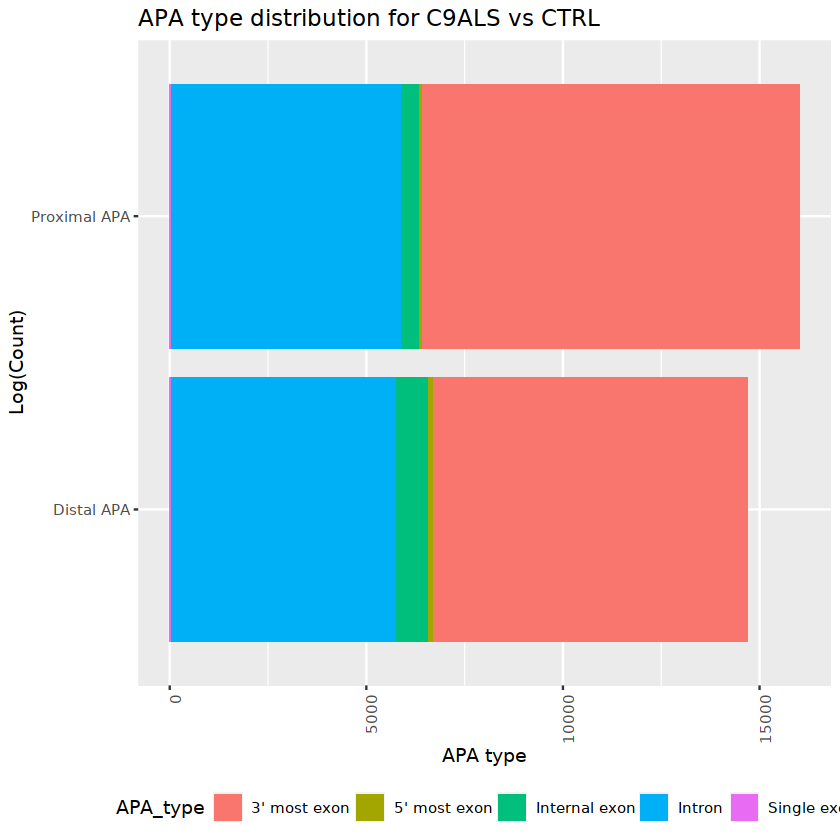

In [27]:
c9df %>% filter(celltype=='Astrocytes') %>% ggplot(aes(y = APA_direction, fill = APA_type)) + 
  geom_bar() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = 'APA type', y = 'Log(Count)', title = 'APA type distribution for C9ALS vs CTRL') +
  theme(legend.position = "bottom")

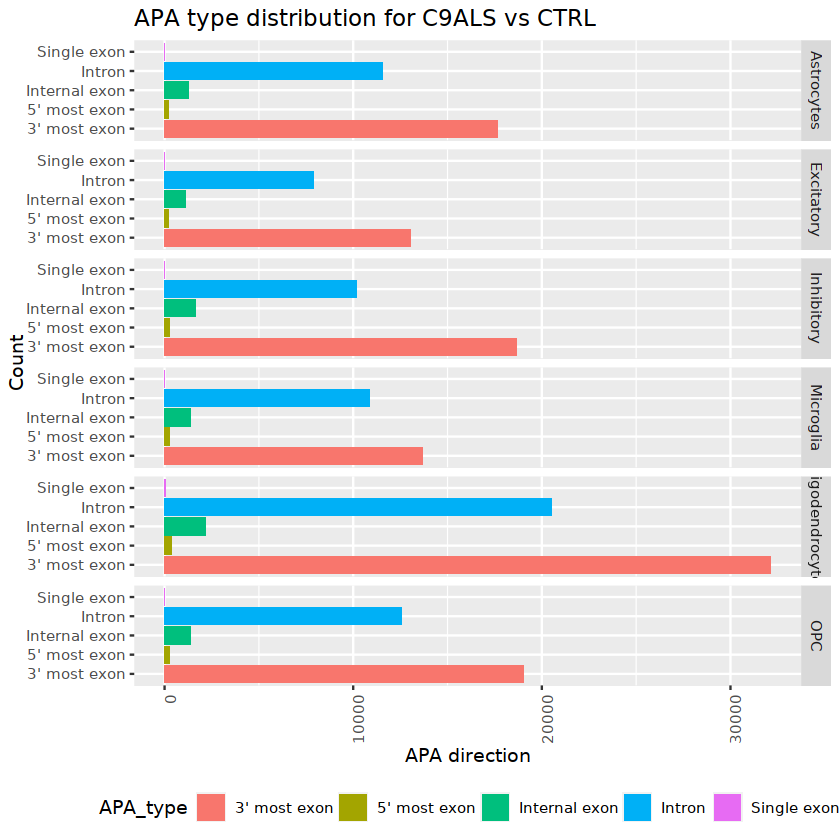

In [9]:
c9df %>% 
  ggplot(aes(y = APA_type, fill = APA_type)) + 
  geom_bar() +
  facet_grid(celltype ~ ., scales = "free") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = 'APA direction', y = 'Count', title = 'APA type distribution for C9ALS vs CTRL') +
  theme(legend.position = "bottom")



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




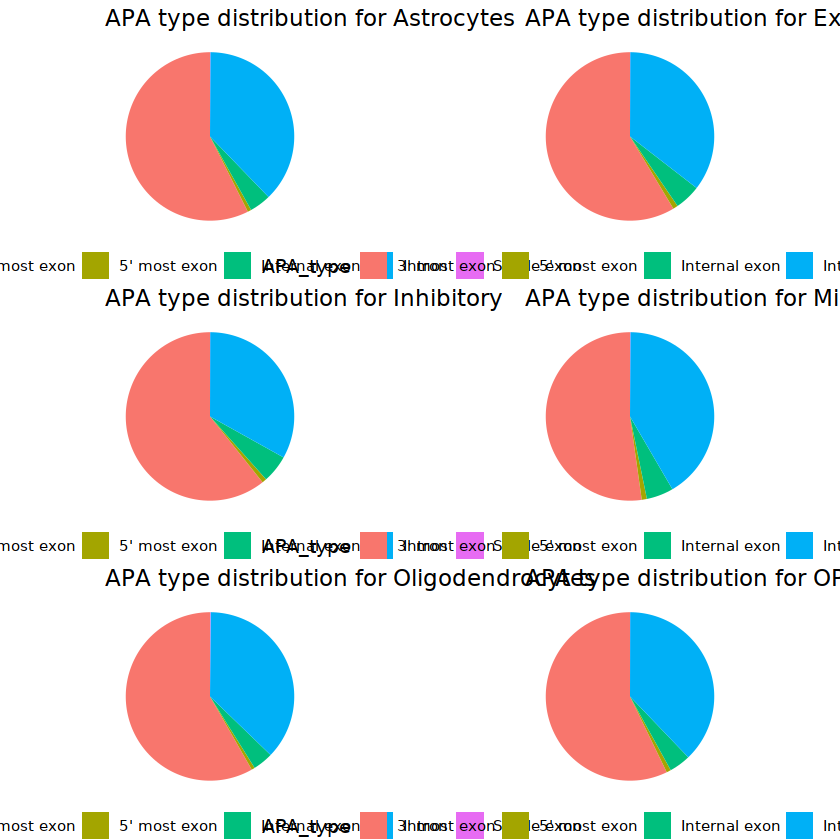

In [14]:
library(ggplot2)
library(dplyr)
library(gridExtra)

# Compute counts per APA_type for each celltype
c9df_counts <- c9df %>%
  group_by(celltype, APA_type) %>%
  summarise(n = n(), .groups = 'drop')

# Get a vector of unique cell types
celltypes <- unique(c9df_counts$celltype)

# Function to generate a pie chart for a given celltype
generate_pie <- function(celltype) {
  c9df_counts %>%
    filter(celltype == !!celltype) %>%
    ggplot(aes(x = "", y = n, fill = APA_type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start = 0) +
    labs(x = NULL, y = 'Count', title = paste('APA type distribution for', celltype)) +
    theme_void() +
    theme(legend.position = "bottom")
}

# Generate a list of pie charts, one for each celltype
pie_charts <- lapply(celltypes, generate_pie)

# Combine the pie charts into a grid layout
do.call(gridExtra::grid.arrange, c(pie_charts, ncol = 2))


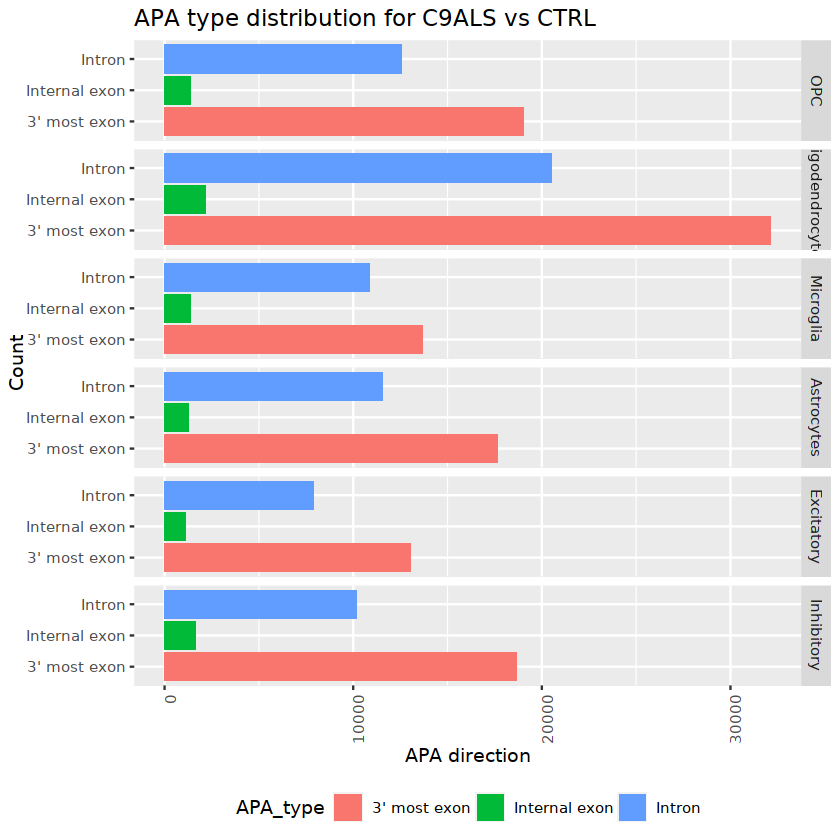

In [10]:

c9df %>%  filter(APA_type %in% c("3' most exon", 'Internal exon', "Intron")) %>%
  mutate(celltype = factor(celltype, levels = rev(c("OPC", "Oligodendrocytes", "Microglia", "Astrocytes", "Excitatory", "Inhibitory")))) %>%
  ggplot(aes(y = APA_type, fill = APA_type)) + 
  geom_bar() +
  facet_grid(celltype ~ ., scales = "free") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = 'APA direction', y = 'Count', title = 'APA type distribution for C9ALS vs CTRL') +
  theme(legend.position = "bottom")


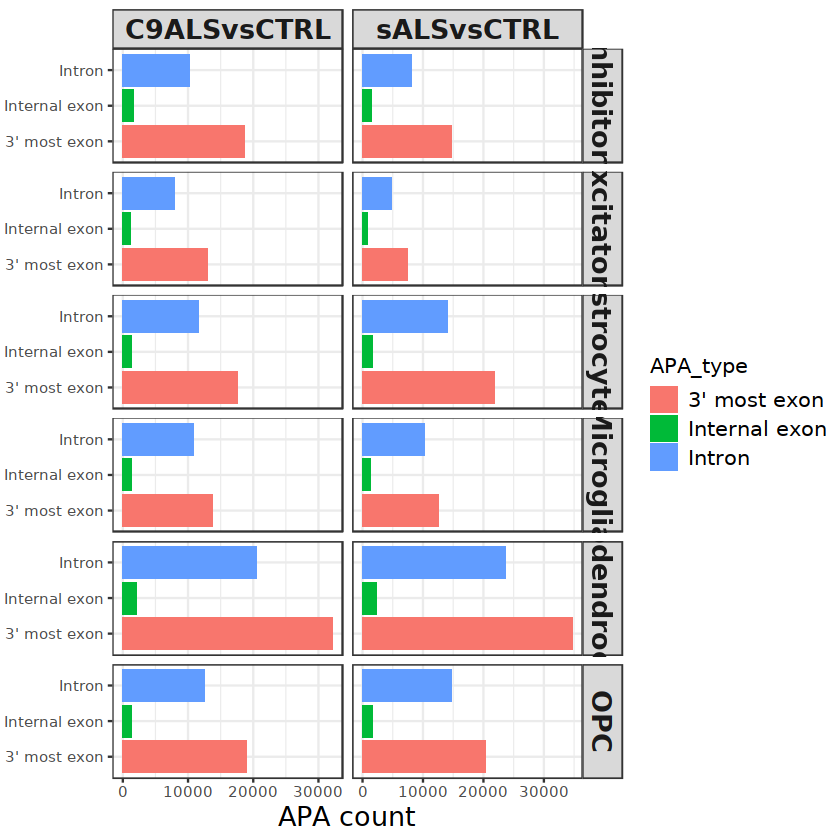

In [9]:
c9df$condition <- 'C9ALSvsCTRL'
salsdf$condition <- 'sALSvsCTRL'

combined_df <- rbind(c9df, salsdf)

combined_df <- combined_df %>% mutate(celltype = fct_relevel(celltype, rev(c("OPC", "Oligodendrocytes", "Microglia", "Astrocytes", "Excitatory", "Inhibitory"))))

combined_df %>% filter(APA_type %in% c("3' most exon", 'Internal exon', "Intron")) %>%
  ggplot(aes(y = APA_type, fill = APA_type)) + 
  geom_bar() +
  facet_grid(celltype  ~ condition , scales = "free") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = 'APA count', y = NULL, title = NULL) +
  theme(legend.position = "bottom") +
   theme_bw() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    strip.text = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 12)
  )
# save in pdf size, 57 mm x 97 mm
ggsave("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/plots/APA_type_barplots_c2.pdf", width = 8, height = 11, dpi = 300)

Picking joint bandwidth of 0.105

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.0551

Picking joint bandwidth of 0.0741

Picking joint bandwidth of 0.155

Picking joint bandwidth of 0.157

Picking joint bandwidth of 0.0736

Picking joint bandwidth of 0.093

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.182

Picking joint bandwidth of 0.102

Picking joint bandwidth of 0.146

Picking joint bandwidth of 0.105

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.0551

Picking joint bandwidth of 0.0741

Picking joint bandwidth of 0.155

Picking joint bandwidth of 0.157

Picking joint bandwidth of 0.0736

Picking joint bandwidth of 0.093

Picking joint bandwidth of 0.115

Picking joint bandwidth of 0.182

Picking joint bandwidth of 0.102

Picking joint bandwidth of 0.146



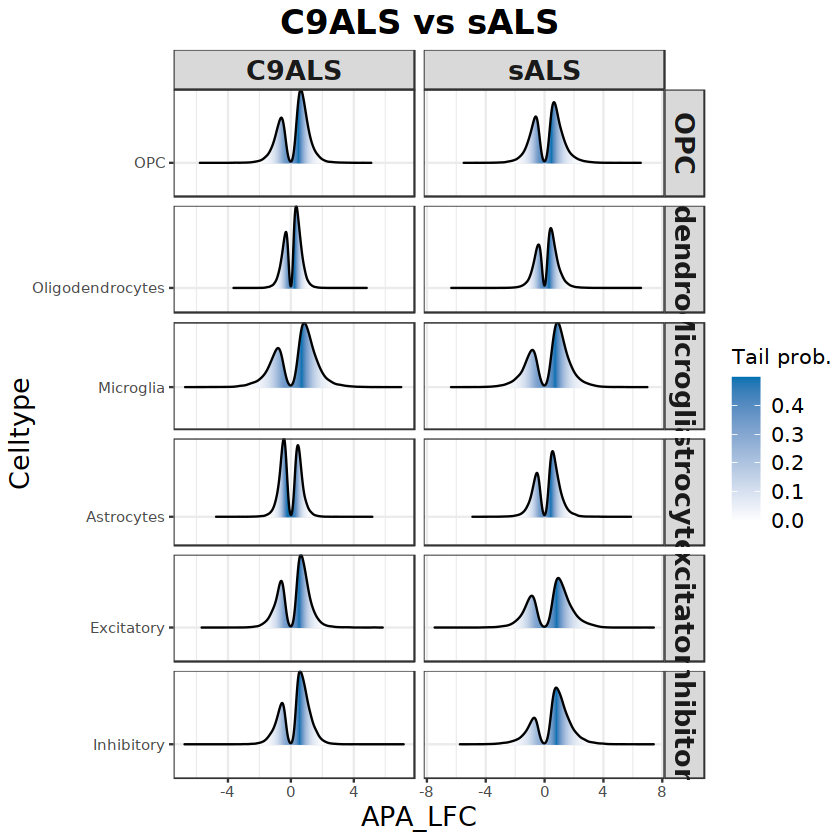

In [10]:
combined_df %>% 
  ggplot(aes(x = APA_LFC, y = celltype, fill = 0.5 - abs(0.5 - stat(ecdf)))) +
  stat_density_ridges(geom = "density_ridges_gradient", calc_ecdf = TRUE) +
  scale_fill_gradient(low = "white", high = "#0072B2", name = "Tail prob.") +
  facet_grid(celltype~condition, scales = "free") +
  labs(title = 'C9ALS vs sALS',
       x = "APA_LFC",
       y = "Celltype") +
  theme_bw() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 2),
    axis.title.y = element_text(size = 16),
    strip.text = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 12)
  )

  ggsave("/data1/APA/Paul_ALS_Data/bams_in/subscelltype_bamfiles/Mapper_outs/results/plots/APA_combided_ridgeplot_2.pdf", width = 8, height = 11, dpi = 300)